<h2>Sales Forecast ArcoPrime Dataset</h2>
<h4>This dataset, is locally storaged in -rawdata- directory as dataset_ts_ventas_train in csv format</h4>
<h4>Additionally, a testing dataset is locally storaged is locally storage in -rawdata- directory as dataset_ts_ventas_test in csv format</h4>
<br>

Dataset Input Features:<br>
['ds', 'precio_ref', 'unidades_total']<br>       
Target:<br>
['monto_total']<br>

Objective:

It was provided daily rental data spanning five years (Jan-2017 to Jan-2022) for training.

It must predict the total daily rental during Feb-2022, covered by the test set, using only information available prior to the rental train period

1.0. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import logging

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import sweetviz as sv

from config.config import Paths
from utils import visualize
from utils import featuring



1.1. Import Raw Dataset

In [2]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

paths = Paths

dataTrainDir = os.path.join(paths.storage_path,'dataset_ts_ventas_train.csv')
dataTestDir = os.path.join(paths.storage_path,'dataset_ts_ventas_test.csv')

columns = ['ds', 'precio_ref', 'unidades_total', 'monto_total']

raw_df_train = pd.read_csv(dataTrainDir, parse_dates=['ds'],index_col=0)
raw_df_test  = pd.read_csv(dataTestDir, parse_dates=['ds'],index_col=0)

logging.info("Raw Dataset Preview Info:")
raw_df_train.info()
raw_df_test.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1854 entries, 2017-01-01 to 2022-01-31
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   precio_ref      1854 non-null   float64
 1   unidades_total  1854 non-null   int64  
 2   monto_total     1854 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 57.9 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2022-02-01 to 2022-02-28
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   precio_ref      28 non-null     float64
 1   unidades_total  28 non-null     int64  
 2   monto_total     28 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 896.0 bytes


1.2. Adding seasonal features to train dataset

    Add dynamic features to training dataset corresponding to:
        - year: numeric 
        - month: numeric
        - dayofweek: numeric
        - workingdat: categorical-binary
        - holiday: categorical-binary
    
    In order to build a in-depth statistical analysis considering dataset as time-series behavior

In [3]:
df_train = featuring.data.add_features(raw_df_train)
df_test  = featuring.data.add_features(raw_df_train)
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1854 entries, 2017-01-01 to 2022-01-31
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   monto_total     1854 non-null   int64  
 1   precio_ref      1854 non-null   float64
 2   unidades_total  1854 non-null   int64  
 3   year            1854 non-null   int64  
 4   month           1854 non-null   int64  
 5   day             1854 non-null   int64  
 6   dayofweek       1854 non-null   int64  
 7   workingday      1854 non-null   int32  
 8   season          1854 non-null   int64  
dtypes: float64(1), int32(1), int64(7)
memory usage: 137.6 KB


monto_total  precio_ref  unidades_total  year  month  day  \
ds                                                                      
2017-01-01       142740       990.0             158  2017      1    1   
2017-01-02       137180       990.0             152  2017      1    2   
2017-01-03       115390       990.0             125  2017      1    3   
2017-01-04        98710       990.0             107  2017      1    4   
2017-01-05        96270       990.0             103  2017      1    5   

            dayofweek  workingday  season  
ds                                         
2017-01-01          6           1       1  
2017-01-02          0           0       1  
2017-01-03          1           0       1  
2017-01-04          2           0       1  
2017-01-05          3           0       1

1.3. EDA report for Training Data<br>
Comparisson between Train and Test Dataset

ref: https://www.analyticsvidhya.com/blog/2021/01/making-exploratory-data-analysis-sweeter-with-sweetviz-2-0/

                                             |          | [  0%]   00:00 -> (? left)

c:\Users\lujan\repos\postulaciones\arcoprime\sale-forecast\env\lib\site-packages\sweetviz\utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
c:\Users\lujan\repos\postulaciones\arcoprime\sale-forecast\env\lib\site-packages\sweetviz\utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
c:\Users\lujan\repos\postulaciones\arcoprime\sale-forecast\env\lib\site-packages\sweetviz\utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
c:\Users\lujan\repos\postulaciones\arcoprime\sale-forecast\env\l


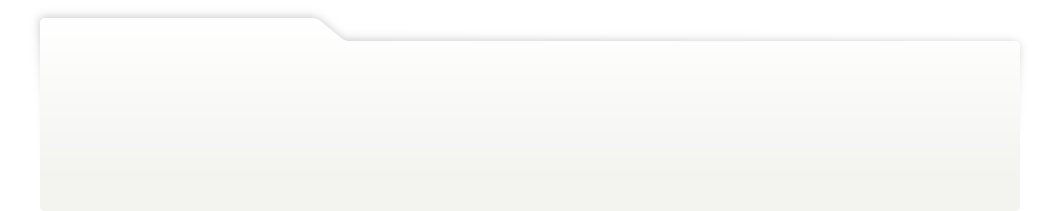
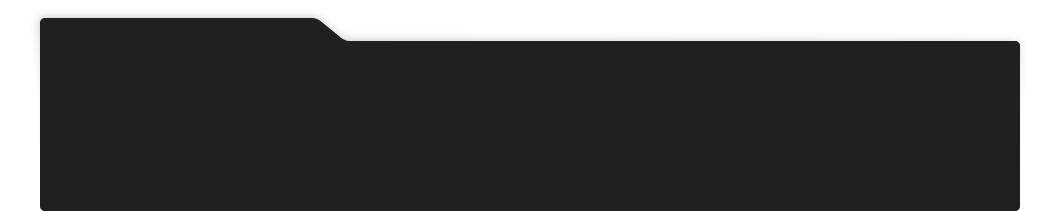
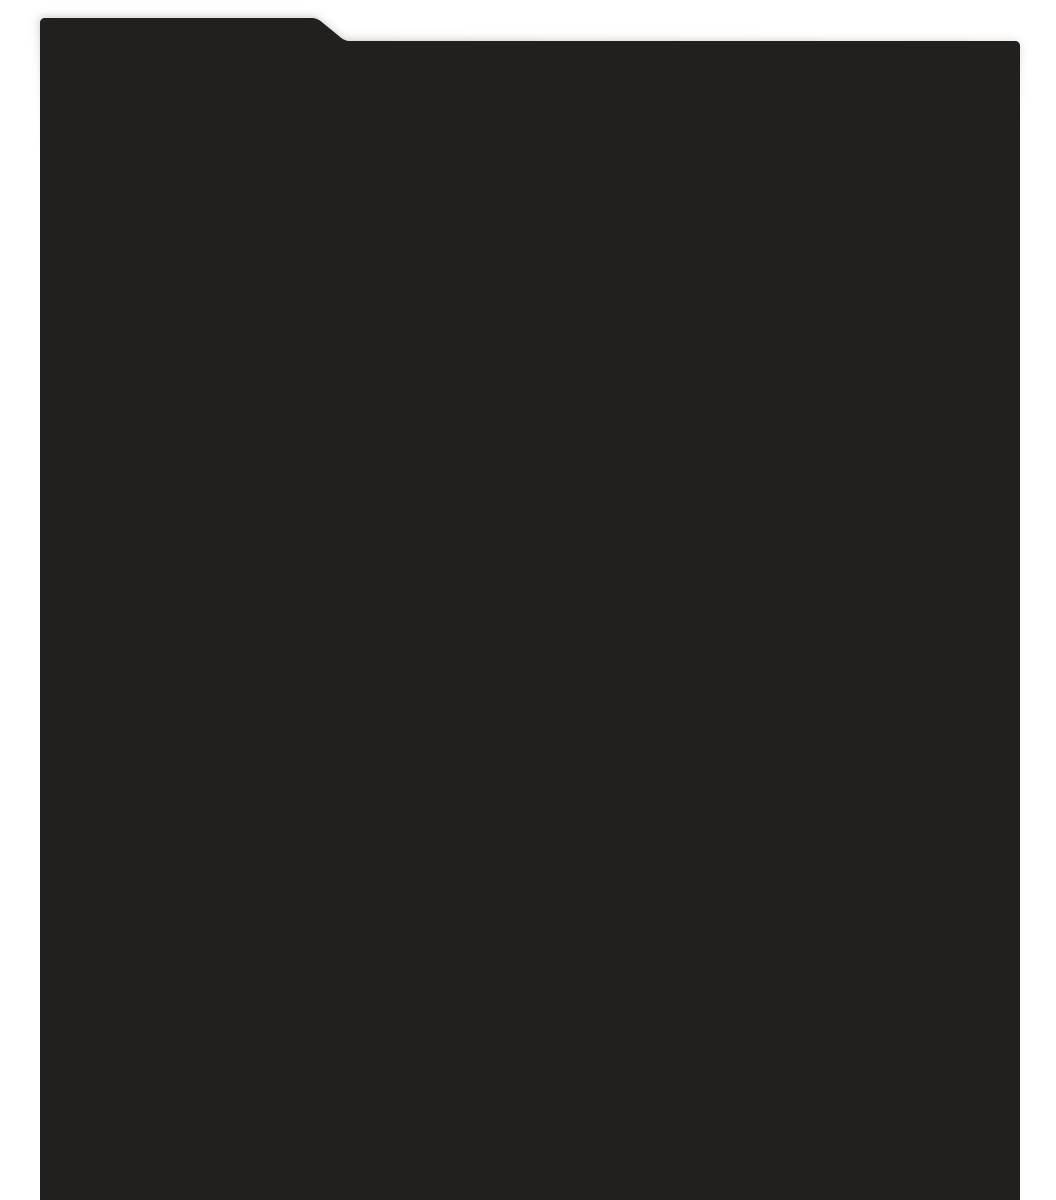
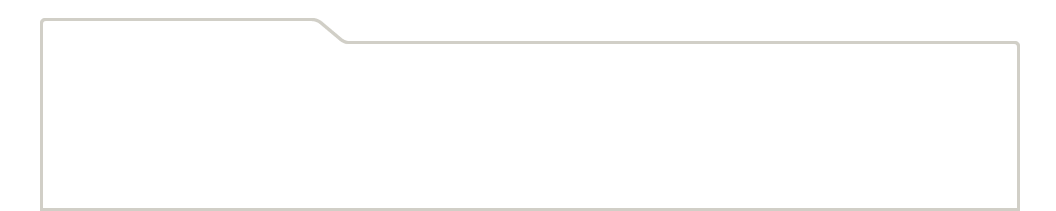
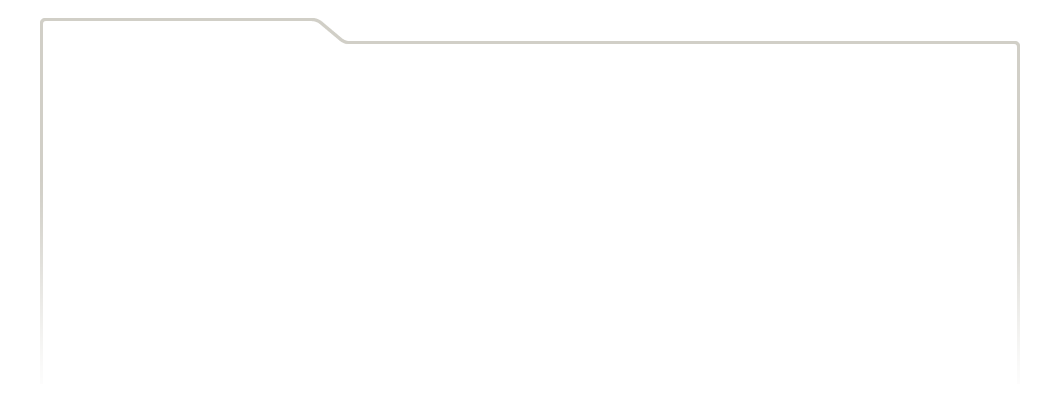
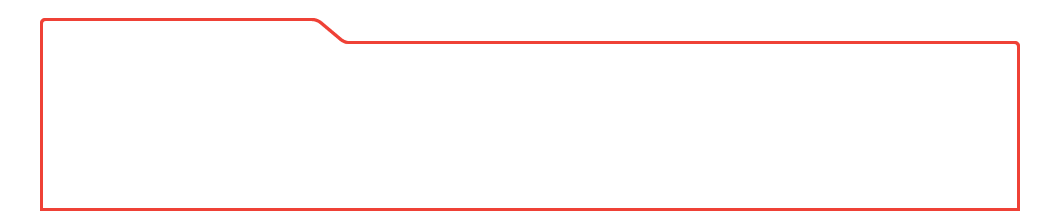
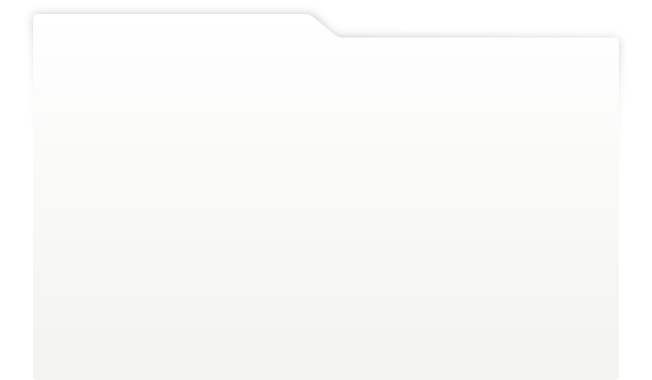
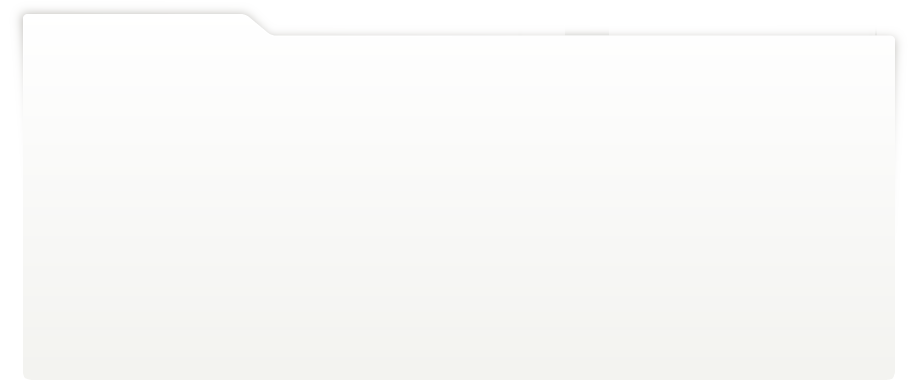
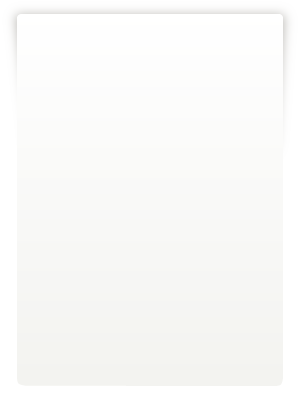
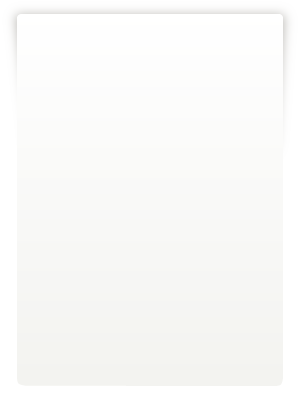
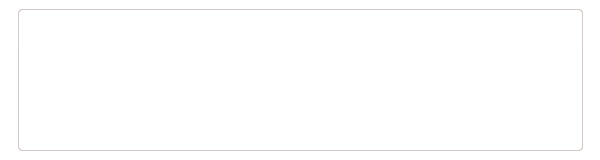
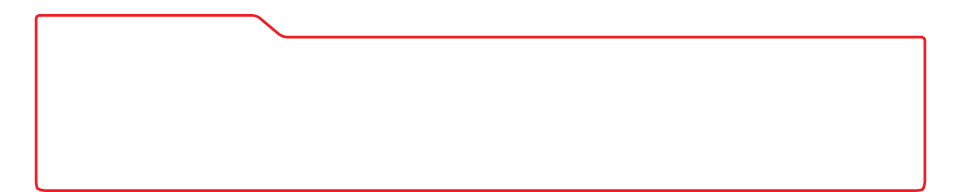
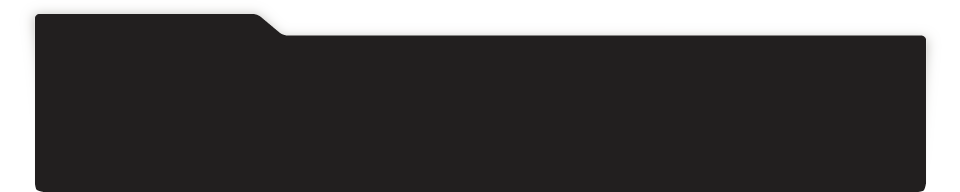
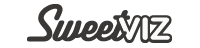
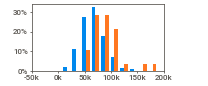
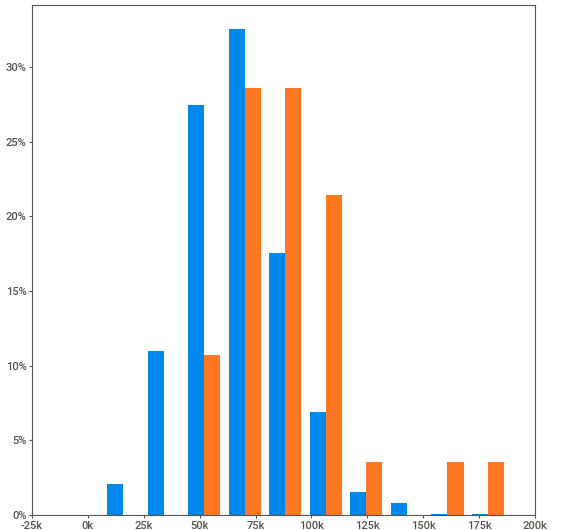
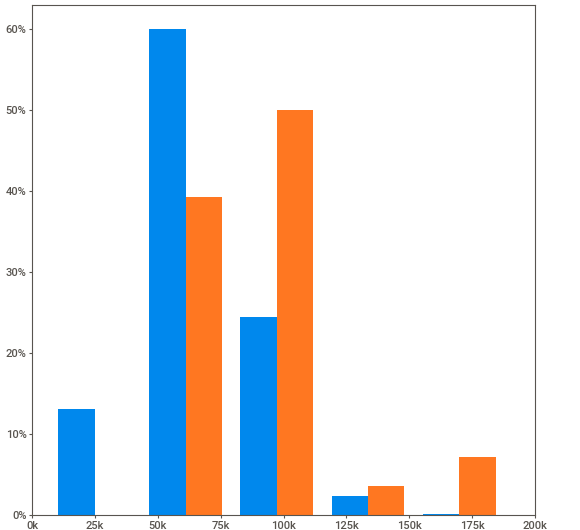
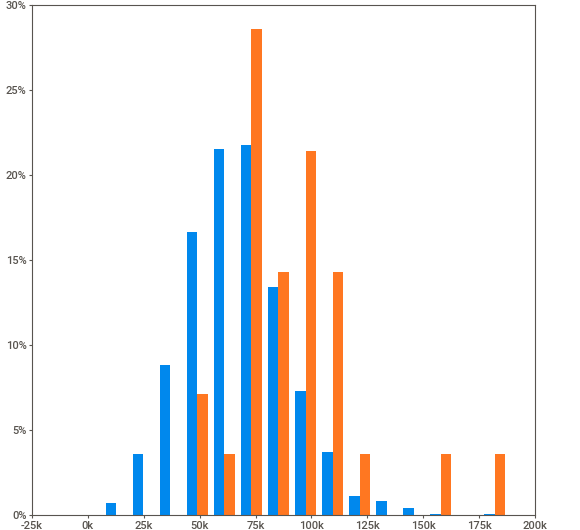
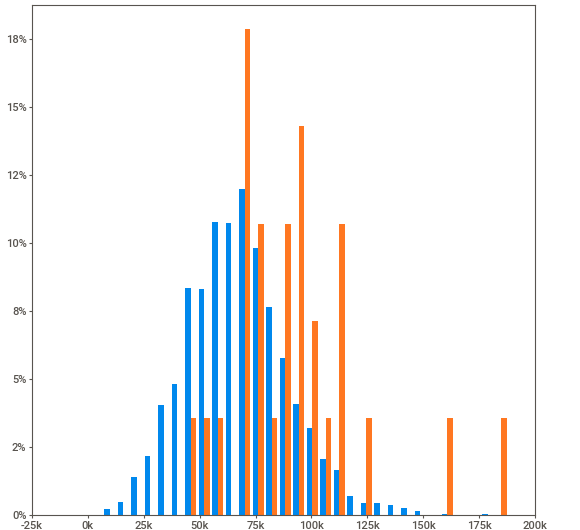
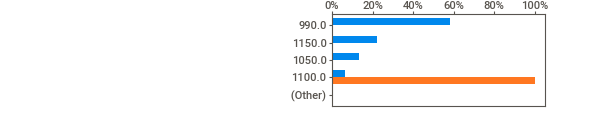
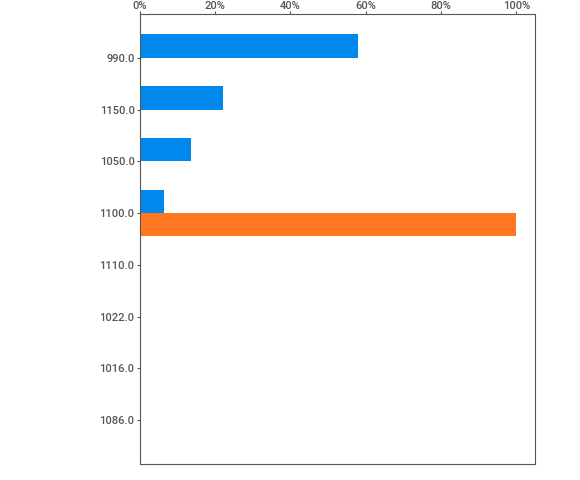
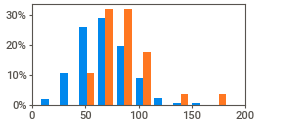
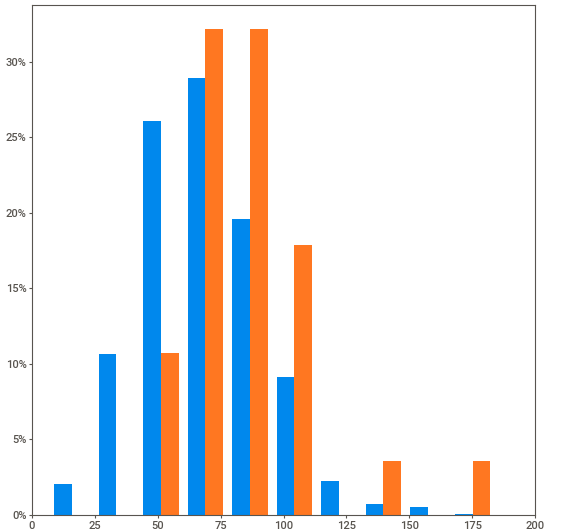
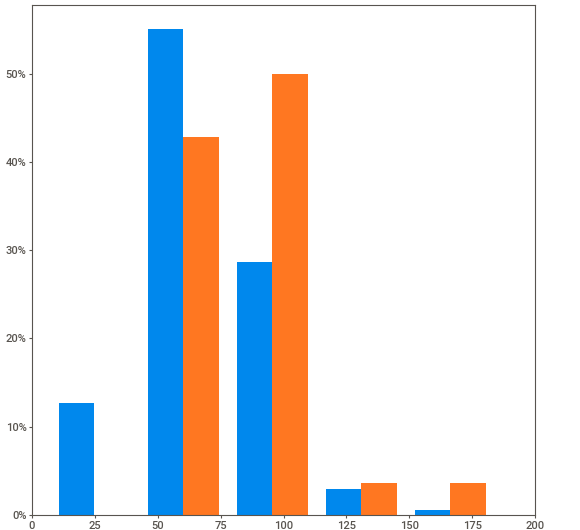
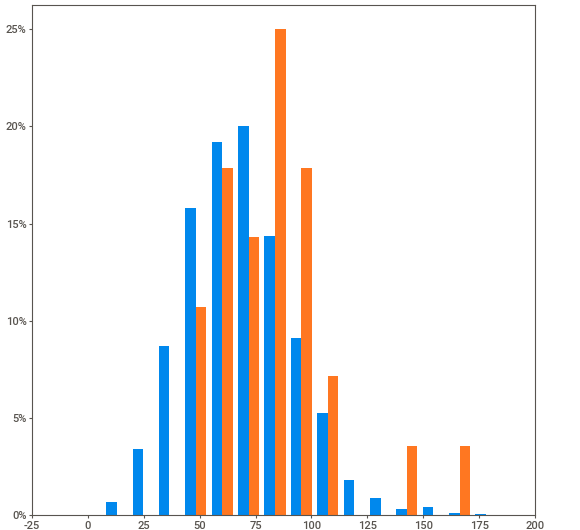
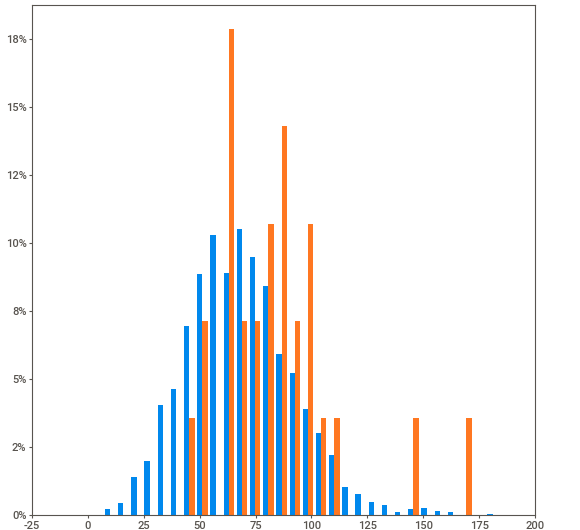
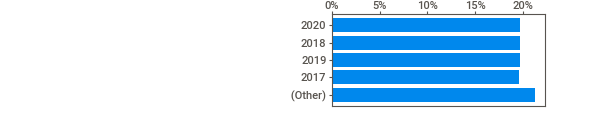
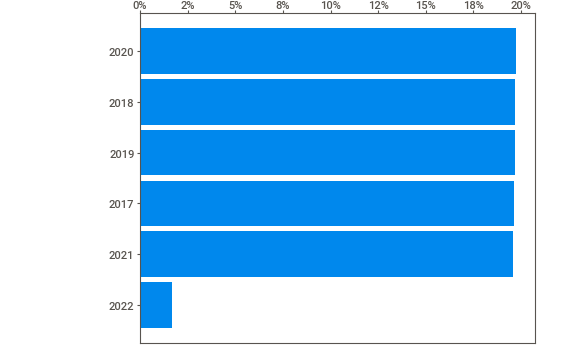
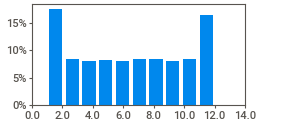
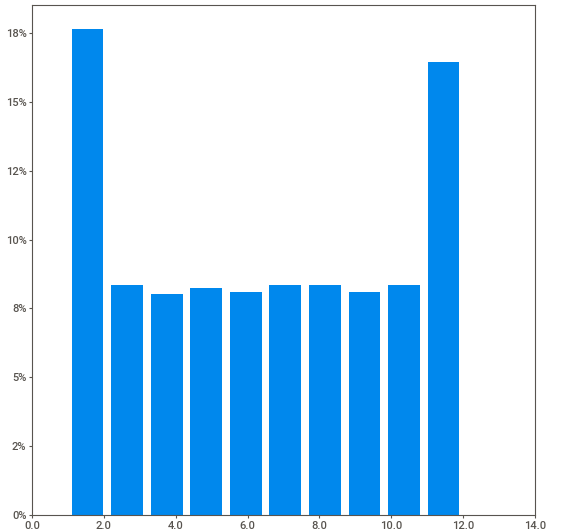
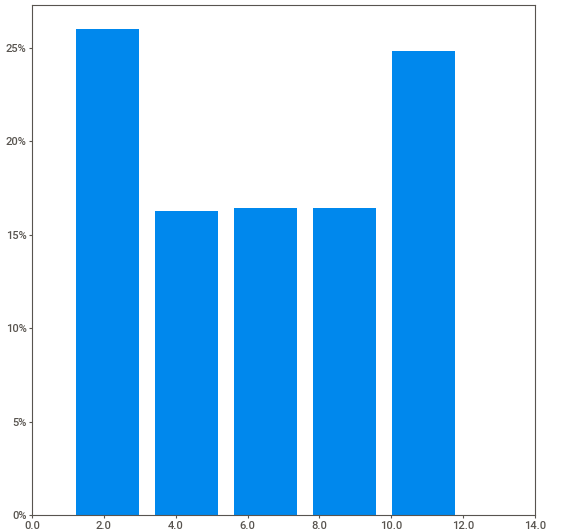
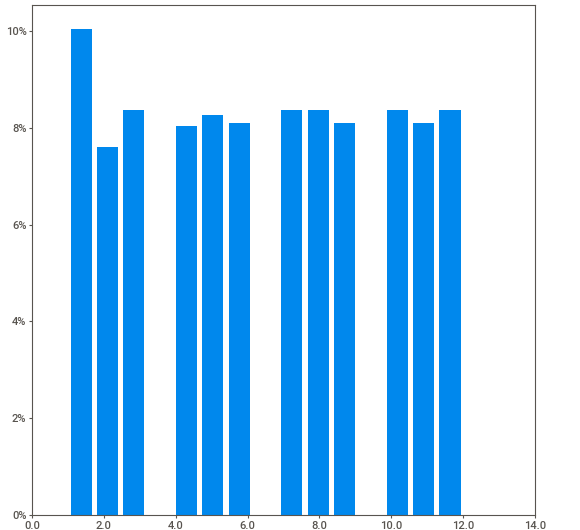
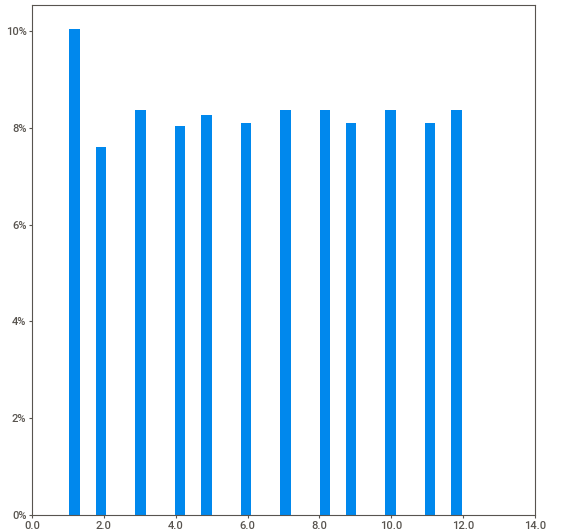
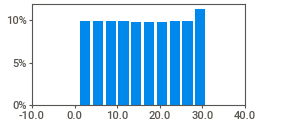
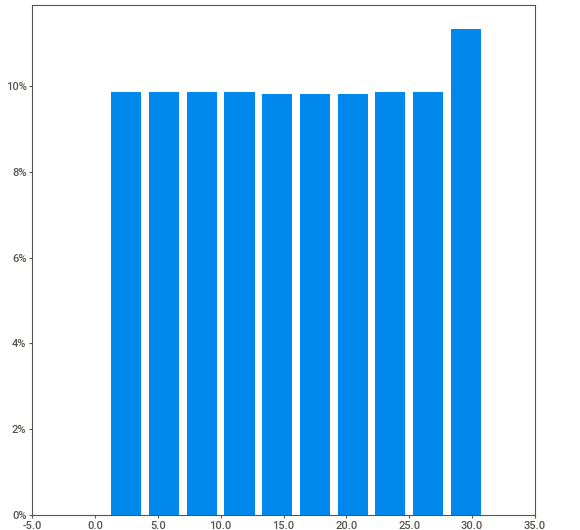
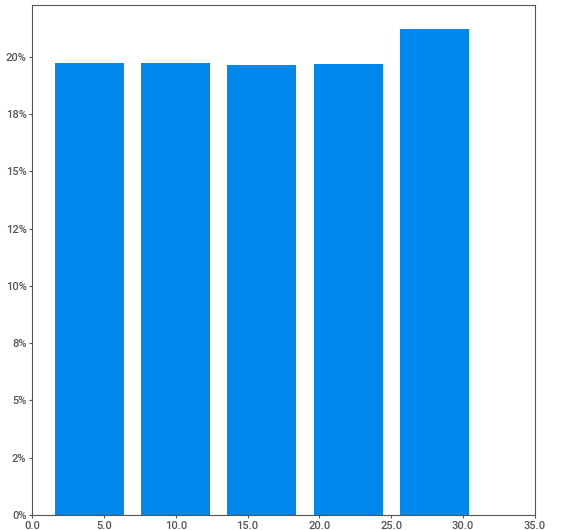
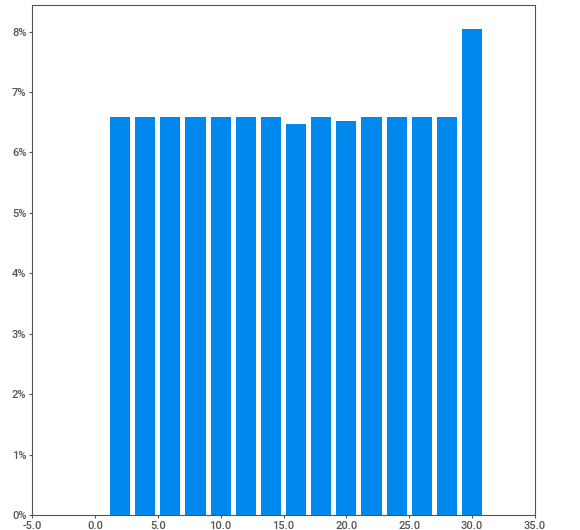
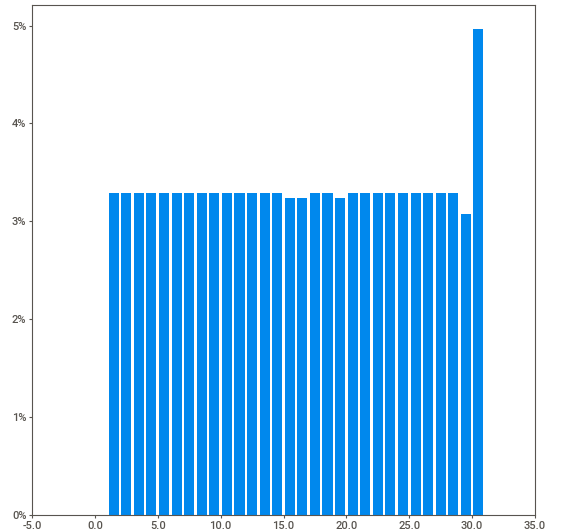
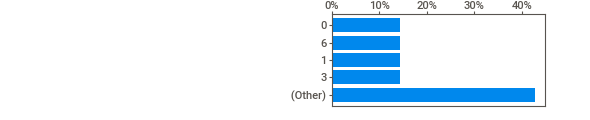
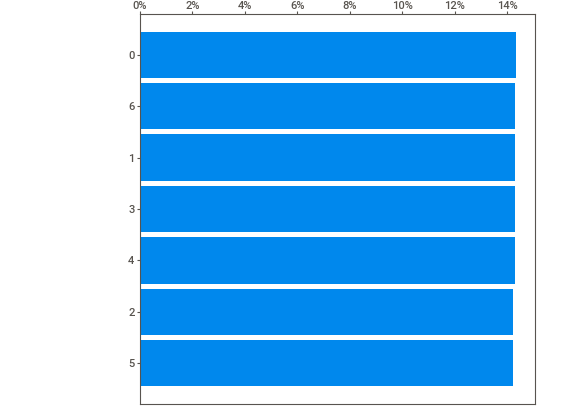
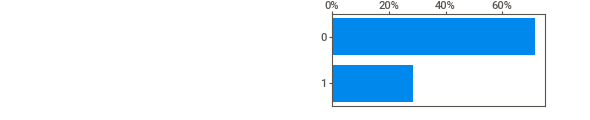
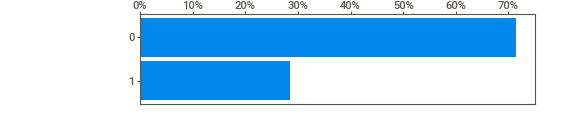
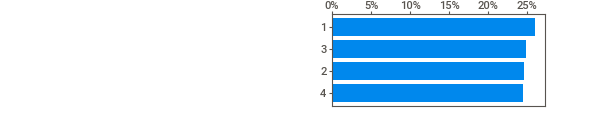
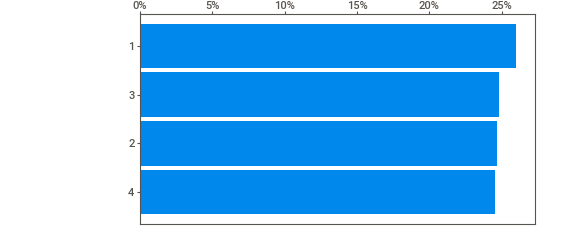
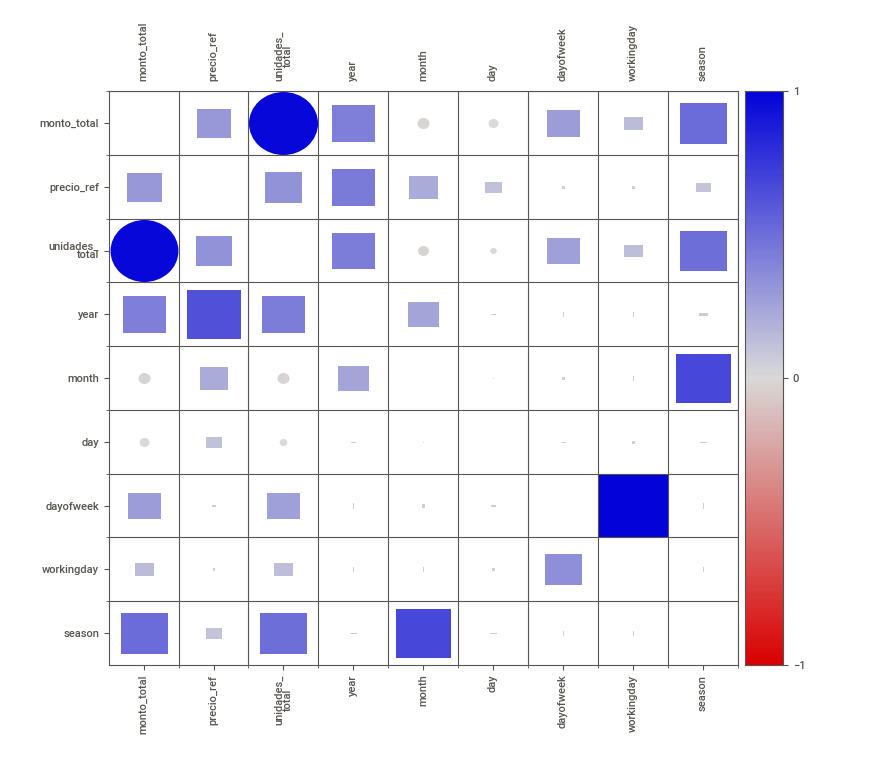
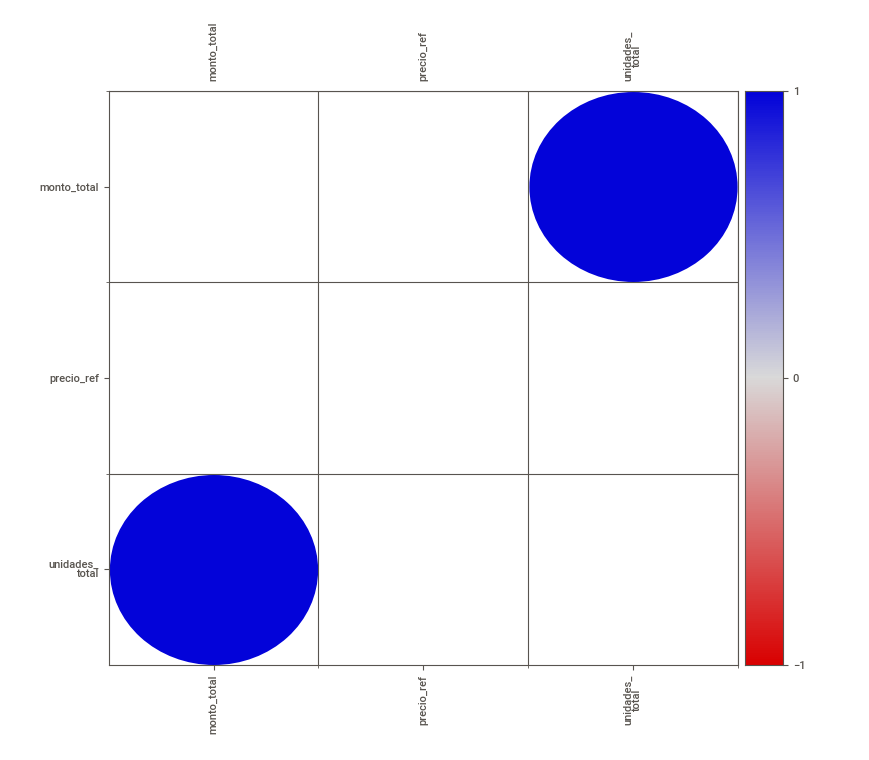

Report 'c:\Users\lujan\repos\postulaciones\arcoprime\sale-forecast\training\data\images\DS_compare.html' was saved to storage.


In [4]:
EDA_report = sv.compare(df_train, raw_df_test)
#display the report
EDA_report.show_notebook(w=None, 
                        h=None,
                        scale=None,
                        layout='vertical',
                        filepath=os.path.join(paths.images,'DS_compare.html'))

1.4. Dataset Analysis by MultiVariate PairPlot<br>

Plot pairwise relationships in a dataset.

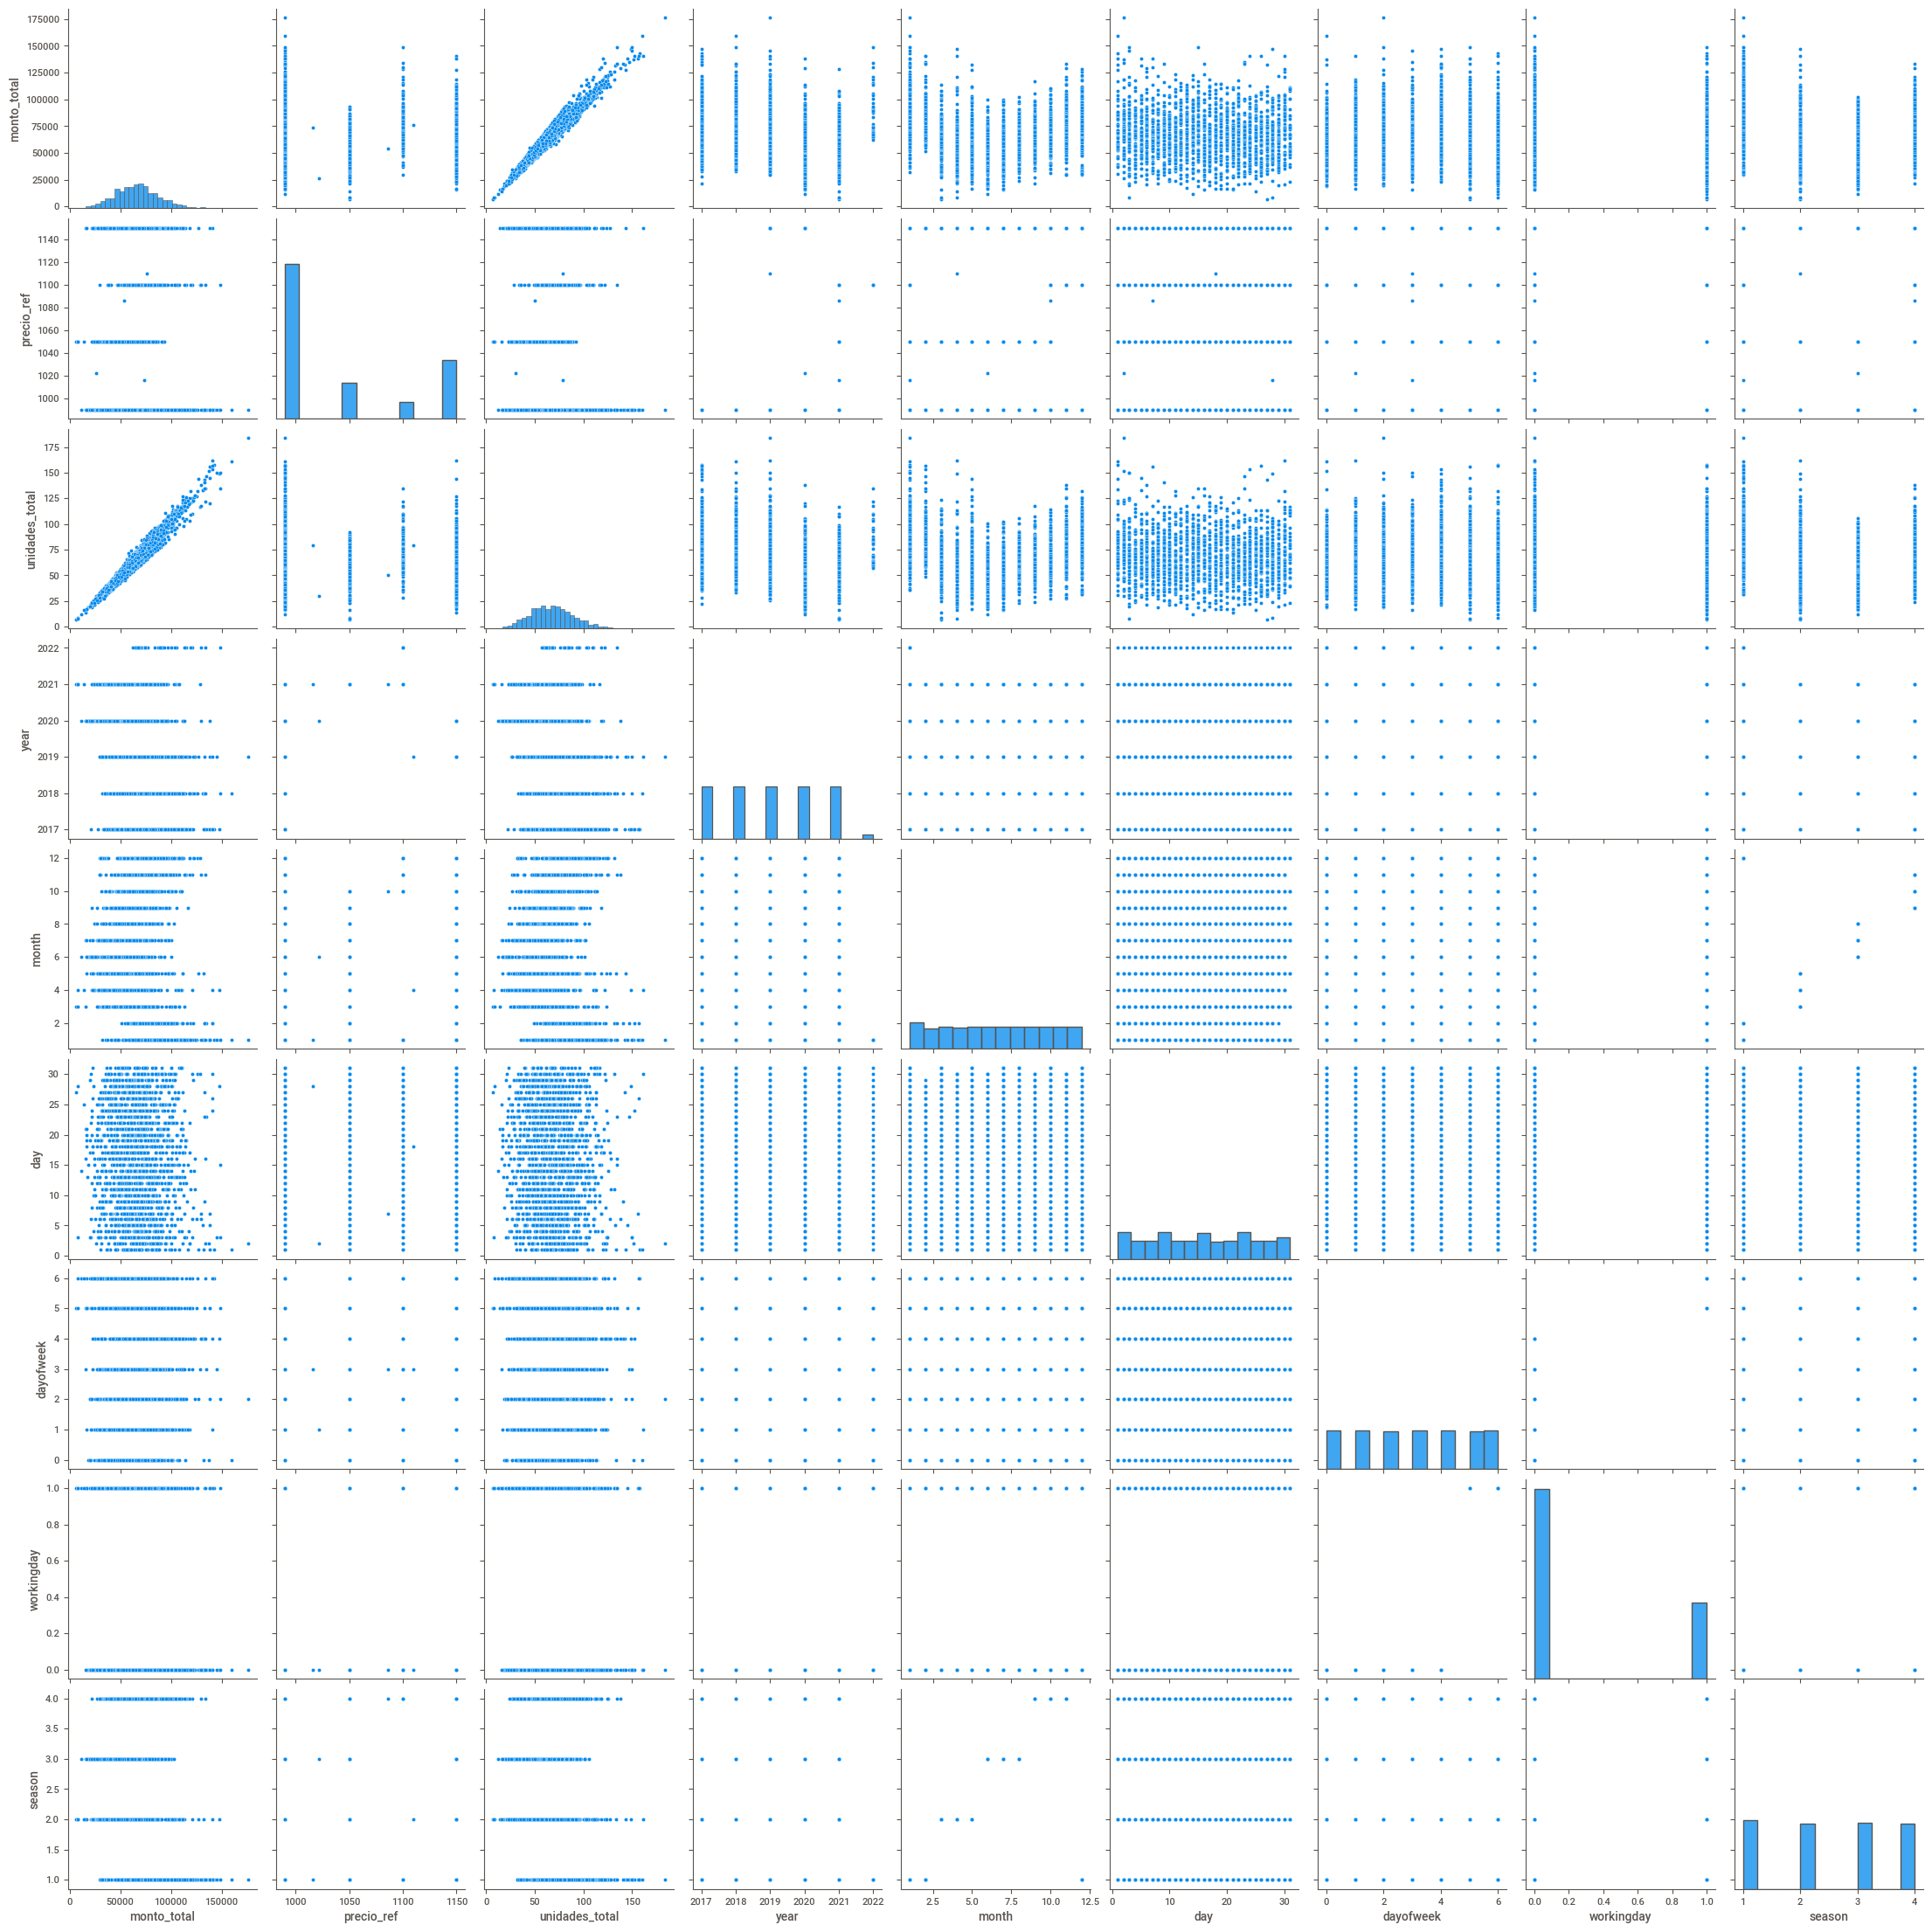

In [5]:
featuring.data.mutilV_analyser(df_train)

1.5. Dataset Analysis with Multiple Seasonal-Trend decomposition using LOESS (MSTL)<br>

ref: https://towardsdatascience.com/multi-seasonal-time-series-decomposition-using-mstl-in-python-136630e67530#:~:text=Time%20series%20decomposition%20is%20about,ARIMA%2DSEATS%20%5B3%5D.

c:\Users\lujan\repos\postulaciones\arcoprime\sale-forecast\training\utils\featuring.py:64: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  mstl_figure.show()


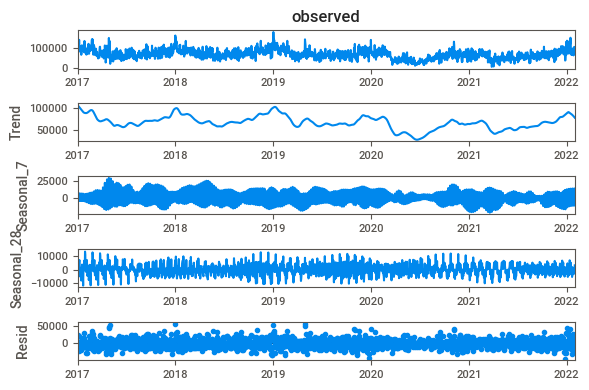

In [6]:
# MSTL seasonal parameters
day_of_week     = 7
weeks_per_month = 4
days_per_month  = 30
period          = [day_of_week, day_of_week*weeks_per_month] # The period of each seasonal component
                                                             # respect to each period - days per month
iterator = 3       # Number of iterations to use to refine the seasonal component
kwargs = {
    "seasonal_deg":0, # seasonal smoother
    }
# Instance MSTL
mstl_res = featuring.data.run_MSTL(paths,
                                        df_train,
                                        'monto_total',
                                        period,
                                        iterator,
                                        kwargs)
                                    

c:\Users\lujan\repos\postulaciones\arcoprime\sale-forecast\training\utils\visualize.py:50: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(df[month_key[0]]['monto_total'],label='2017')
c:\Users\lujan\repos\postulaciones\arcoprime\sale-forecast\training\utils\visualize.py:51: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(df[month_key[1]]['monto_total'],label='2018')
c:\Users\lujan\repos\postulaciones\arcoprime\sale-forecast\training\utils\visualize.py:52: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `fr

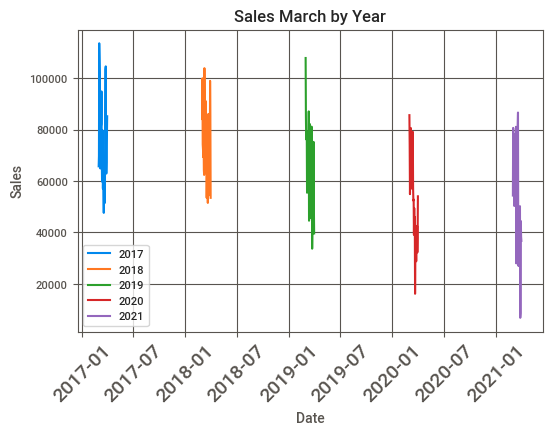

In [7]:
# Year to year trend in March

visualize.covid_month_show(df_train, '03')

In [8]:
#dataClean = df_train.to_csv(os.path.join(paths.data,'dataset.csv'))
testClean = df_test.to_csv(os.path.join(paths.data,'dataset_eval.csv'))